In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/admin/PycharmProjects/pythonProject1/data/medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

In [6]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False


# As we are trying to predict the charges (i.e. medical costs for a person) based on other feature (age, sex, bmi, smoker, children, region) 
## We need to understand what charges looks like (__distribution__)
### Does it look like a hill (__normal distribution__)?
### Or is it skewed? Ex: a lot of people with low charges, and a few with very high charges-this is called __right-skewed__

In [7]:
import seaborn as sb
import matplotlib.pyplot as plt

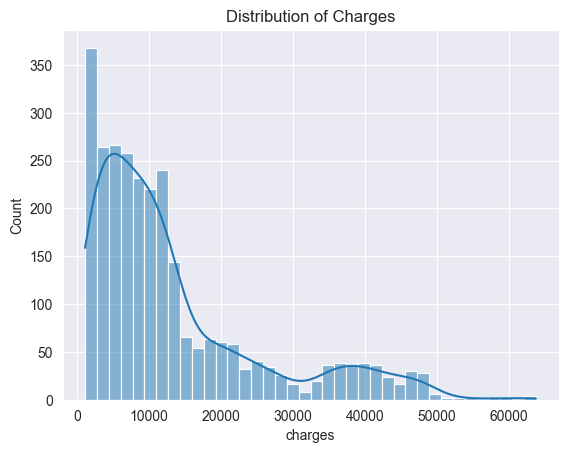

In [8]:
sb.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

### Do smokers have higher charges in the boxplot?
### Does age show an upward trend in the scatterplot?
### Is there a sudden spike in charges after a certain BMI


<Axes: xlabel='smoker', ylabel='charges'>

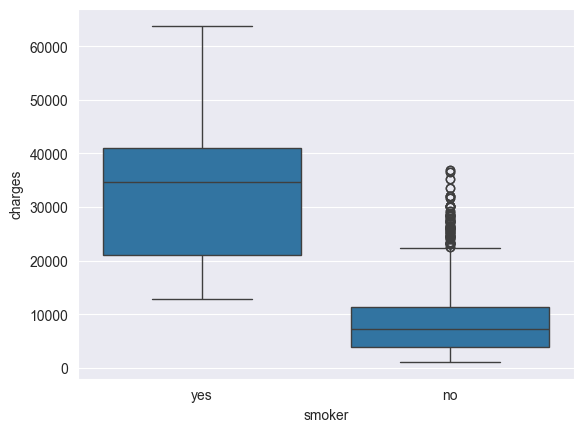

In [9]:
sb.boxplot(x='smoker', y='charges', data=df)

### Customers who smoke, are more likely to be charged more than those who not. 

<Axes: xlabel='age', ylabel='charges'>

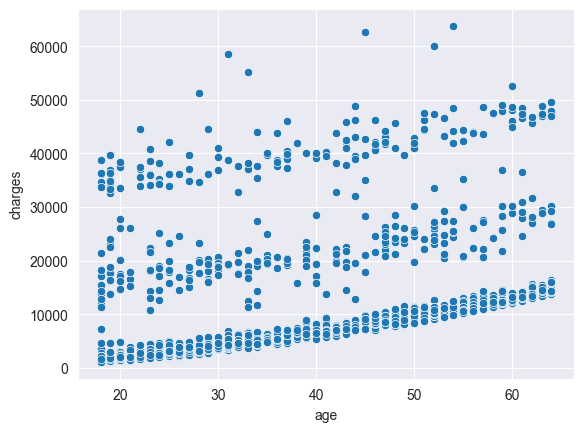

In [10]:
sb.scatterplot(x='age', y='charges', data=df)

### Younger customers will have to pay less than elders.

<Axes: xlabel='bmi', ylabel='charges'>

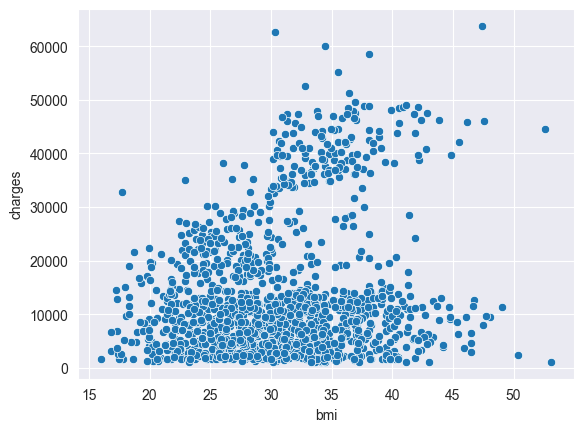

In [11]:
sb.scatterplot(x='bmi', y='charges', data=df)

### The more bmi index that customer have, the more fee they have to pay for medical insurance

In [15]:
df['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [16]:
df['sex'].value_counts()

sex
male      1406
female    1366
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

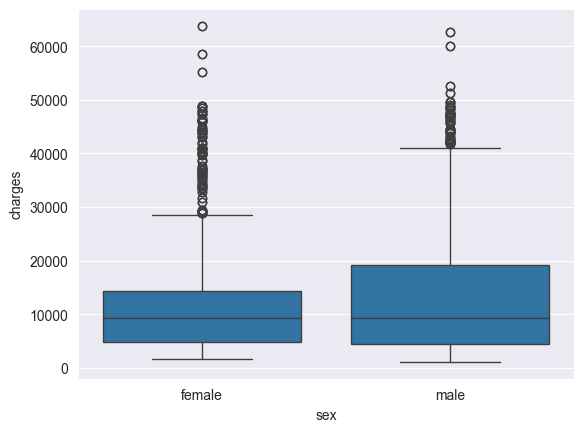

In [17]:
sb.boxplot(x='sex', y='charges', data=df)

<Axes: xlabel='region', ylabel='charges'>

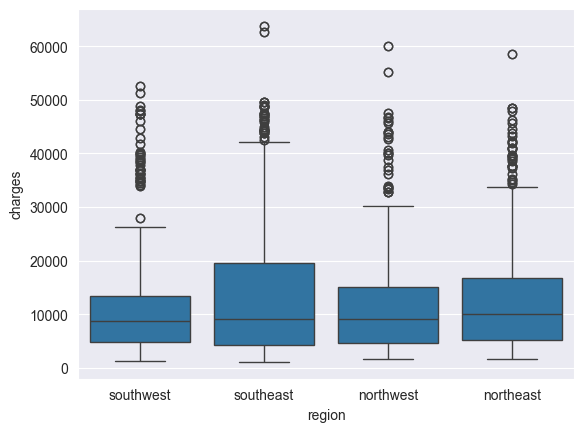

In [18]:
sb.boxplot(x='region', y='charges', data=df)

<Axes: xlabel='age', ylabel='Count'>

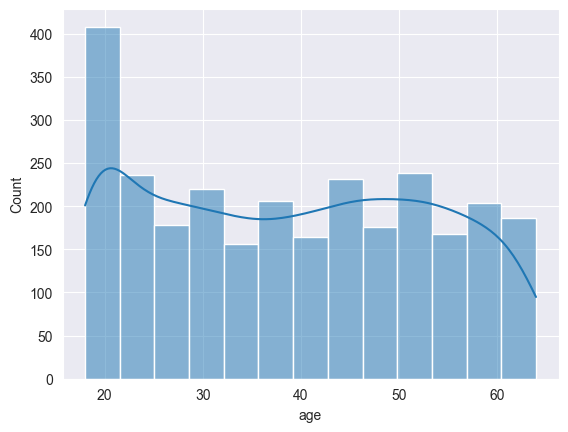

In [19]:
sb.histplot(df['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

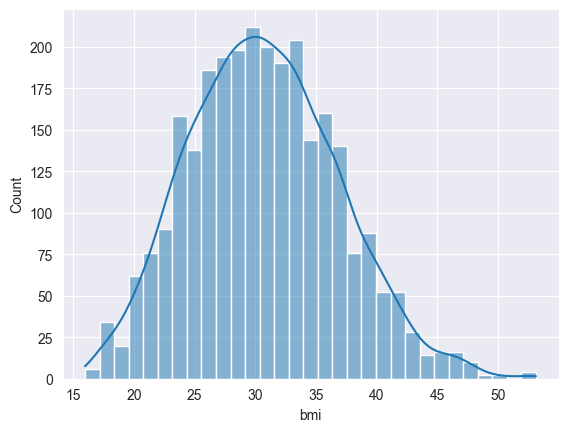

In [21]:
sb.histplot(df['bmi'], kde=True)

<Axes: xlabel='children', ylabel='charges'>

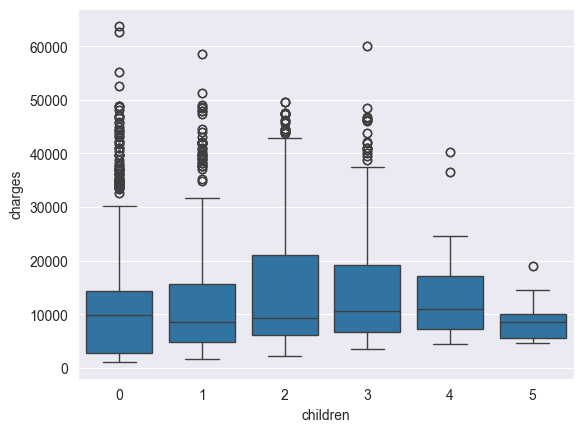

In [25]:
sb.boxplot(x='children', y='charges', data=df)

<Axes: >

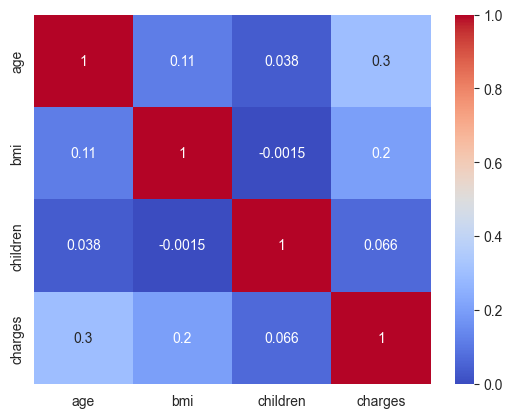

In [23]:
corr = df.corr(numeric_only=True)
sb.heatmap(corr, annot=True, cmap='coolwarm')

### If age->charges: moderate correlation
### if BMI ->weak or no correlation
### children might not be strongly correlated at all